## Project Notes for Readme
#### Notes references and code tryouts - this is not my submission as Readme file. 

## Summary of the Iris dataset

The Iris flower data set, also known as Fisher’s Iris data set, is a multivariate data set that was introduced by British statistician and biologist Ronald Fisher. <br>The data was collected by Edgar Anderson to quantify the morphologic variation of Iris flowers of three related species and was utilised by Fisher to demonstrate the use of linear discriminant analysis in his 1936 paper titled “The use of multiple measurements in taxonomic problems” published in the Annals of Eugenics.
<br>Today the dataset is widely used as a typical test case for statistical classification in machine learning. 
The Iris dataset contains 50 samples of three Iris flower species: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features measured in centimetres: sepal and petal length and width. Using these four variables, Ronald Fisher developed a linear discriminant model to differentiate between the species.*(Ref: Wikipedia 2023, (https://en.wikipedia.org/wiki/Iris_flower_data_set)*

Importing relevant libraries<br>
+ numpy - is a library for adding support for large, multi-dimensional arrays along with a large collection of high-level mathematical functions to operate on these arrays (ref: https://en.wikipedia.org/wiki/NumPy)
+ pandas - for data manipulation and analysis (ref: https://en.wikipedia.org/wiki/Pandas_(software))
+ matplotlib - for creating graphical representation of data (ref: https://en.wikipedia.org/wiki/Matplotlib)
+ seaborn - same as above with extended finctionality and styling options (ref: https://en.wikipedia.org/wiki/Matplotlib)

In [1]:
import numpy as np # for mathematical functions
import pandas as pd # for creating and manipulating dataframe
import matplotlib.pyplot as plt # for creating graphical representation of data
import seaborn as sns # # for creating prettier graphical representation of data

## Reading in Iris dataset and add headers

#### Datasource:
iris.data and iris.names files downloaded from https://archive.ics.uci.edu/ml/datasets/iris in a comma-separated value file format

#### Reading in data
Data will be analysed using Pandas which is a popular data analysis library in Python that provides user-friendly data structures and data analysis tools. A Pandas DataFrame is a two-dimensional table with labelled columns and rows, similar to a spreadsheet. (ref: https://towardsdatascience.com/a-python-pandas-introduction-to-excel-users-1696d65604f6)
<br>

+ Read in iris dataset from filename stored in 'SOURCEDATA'
+ adding headers manually from downloaded iris.names source file
+ combine with pandas to create a dataframe storedf as 'df'

In [2]:
SOURCEDATA="iris.data" # store filename
# create headers, taking header names manually from "iris.names" source file
headers=[
    "sepal length (cm)", 
    "sepal width (cm)", 
    "petal length (cm)", 
    "petal width (cm)",
    "species"]
# combine the two into a dataframe using pandas read_csv function and store the dataframe in 'df' //read_csv ref: (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
df=pd.read_csv(SOURCEDATA, names=headers)

Check dataframe structure

In [3]:
df.head() # checking labels and data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Column labels and data aligned as expected.

Checking for anomalies before starting analysis in case cleaning is required.
+ df.info() #outputs column names, count of non-null values and datatypes #ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
+ df.isnull().sum() # outputs number of null entries

In [4]:
print("-------> dataframe info: \n")
print(df.info()) # ref: https://www.tutorialspoint.com/exploratory-data-analysis-on-iris-dataset
print("-------> Checking for Null entries: \n")
print(df.isnull().sum()) #outputs the number of null entries in the dataframe
print("\n")


-------> dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
-------> Checking for Null entries: 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64




It appears there are 150 entries per column, 4 columns contain floating point numbers and one contains text data.
In the subsequent check, it was found that there are no 0 entries found in the dataframe which is good news for anyone about to attempt carrying out analysis on the data as 0 entries can cause unexpected results with calculations, comparison of data and pandas functions.

## Project task 1. Output a summary of each variable to a single text file
<br>
Pandas DataFrame describe() method returns a description of the data in the DataFrame. The description -if the data is numeric- contains the following information: 
+ count - The number of not-empty values.
+ mean - The average (mean) value.
+ std - The standard deviation.
+ min - the minimum value.
+ 25% - The 25% percentile*.
+ 50% - The 50% percentile*.
+ 75% - The 75% percentile*.
+ max - the maximum value.
<br>(ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
<br>(ref: https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,std%20%2D%20The%20standard%20deviation)

In [5]:
df.describe() #ref: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This summary reveals that there are 150 values for each measurement which makes later comparisons easier. It also shows that based on the standard variation (std) figures, sepal width values have the lowest variation and the petal length values have the highest. However, it is more useful to separate these figures by species so the data can be used for comparison.

In [6]:
#irises=['Iris-setosa','Iris-versicolor','Iris-virginica'] # originally used manual entry for species but unique() is more universal
irises=df['species'].unique() # unique function ref: https://www.educative.io/answers/what-is-the-unique-function-in-pandas
for i in irises: #this will iterate through all iris species and only .describe() data relevant to the species in the current iteration
    print(i,'\n',df.loc[df['species']==i][headers[0:4]].describe()) #conditional filtering ref: https://www.kdnuggets.com/2022/12/five-ways-conditional-filtering-pandas.html


Iris-setosa 
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.418000           1.464000   
std              0.35249          0.381024           0.173511   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.125000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count          50.00000  
mean            0.24400  
std             0.10721  
min             0.10000  
25%             0.20000  
50%             0.20000  
75%             0.30000  
max             0.60000  
Iris-versicolor 
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean            5.

The describe() method applied to each species provides a more comprehensive view of the data. It shows that every species have an equal number of samples (50) for each of the 4 measurements. This will allow direct comparison without truncating for example. However, differences between species are not significant enough to rely on numeric analysis alone. A graphical representation would be more suitable to highlight the differences and similarities among species...

### Output summary to a text file.


In [7]:
#output to string ref: https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file
with open('summary.txt','w') as f:
    f.write(f"THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET:\n\n{df.describe().to_string()}")
    f.write(f"\n\n\nTHE SUMMARY OF EACH VARIABLE BY SPECIES IN THE IRIS DATASHEET:\n")
    for i in irises:
        f.write(f"\n\t\t\t\t\t{i}\n\n{df.loc[df['species']==i][headers[0:4]].describe().to_string()}\n")#describe().to_string ref: https://stackoverflow.com/questions/34097038/issue-calling-to-string-with-float-format-on-pandas-dataframe
    

As per the project task description, the results of the summary analysis are saved into a text file that includes both an overall summary of the data and a species-specific summary, divided by title text for ease of readability.

## Project task 2. Create histogram of each variable and save results in png files

+ Created a function 'fn_pnghist(column)' to plot a histogram for each variable (the measurements of the sepal and petal dimensions) 
+ The 'column' argument stores the data frame column header label for the different variables for the histogram.
+ Creating a function instead of making individual plots, allows for setting a custom style only once and having a uniform style for each histogram (ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html)
+ save the histogram of each variable to png files using **savefig** method (ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/)
+ set histogram title to equal header label so data in each histogram can be identified

In [8]:
# create a function to draw up histograms with column data as a variable and set custom style
# ref: https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/
# ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html
# adding save to .png file feature to the previous function to save the histograms with column data as variable and column name as file name
def fn_pnghist(column):
    plt.style.use('dark_background')
    plt.grid(True, color="#F3E4C0", linestyle="dotted")
    df[column].hist(bins=10, color="#5D3FD3") #Iris is a vivid shade of violet-tinged blue with the hex code #5D3FD3 (ref: google.com)
    plt.suptitle(f"Histogram of {column}")
    plt.savefig(f"{column}.png") # save plot ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
    plt.show() # turns out plt.show() must be left in the end of the function to avoide having all histograms on one plot 💁


Batch plotting and saving all individual histograms in one go by creating a **for** loop to cycle through the relevant data frame columns in *iris data* and call the 'fn_histpng(column)' function to draw a histogram with each variable as per their column label.<br>
As 'headers' was already established to store data frame column header labels in a list, it was reused for the **for** loop.
The last item of the list was sliced out from the loop in order to exclude 'species' which is the last column header label and is not a flower measurement.

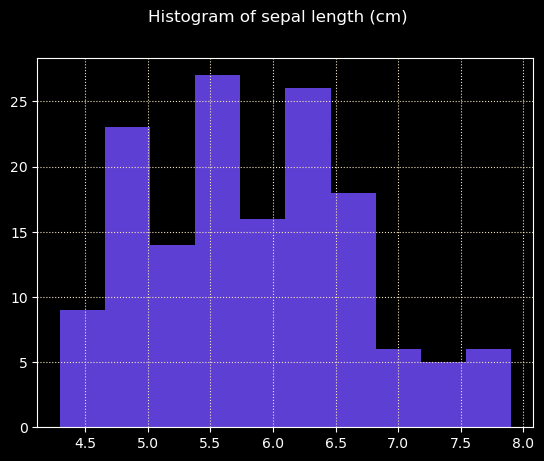

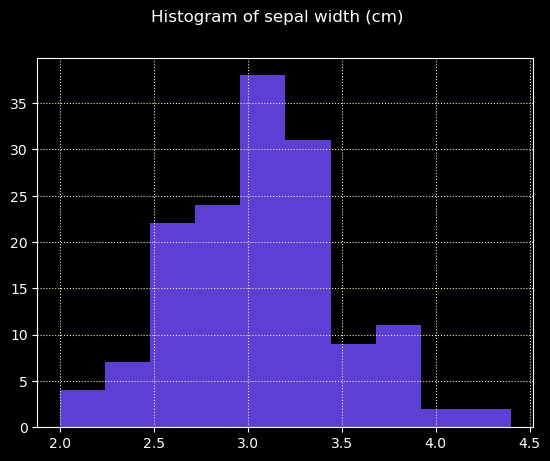

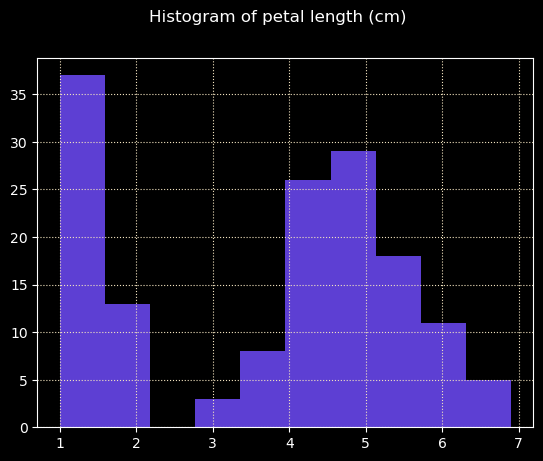

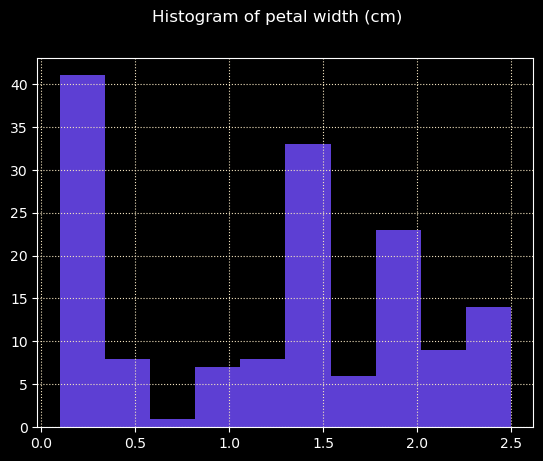

In [9]:
for h in headers[:-1]: # to avoid including 'species' column which is not a measurement, the last item is excluded.
    fn_pnghist(h)

## Project task 3. Output a scatter plot of each pair of variables

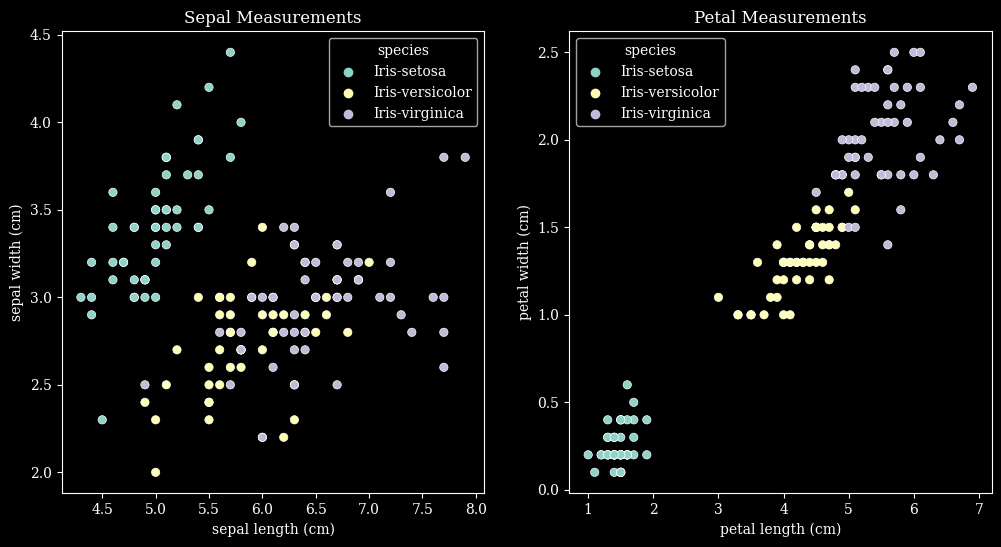

In [10]:
#-----Set plot style 
plt.style.use('fast') #ref: https://matplotlib.org/stable/gallery/style_sheets/index.html
plt.rc("font", family="serif")# default text style ref: customise default style ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

#-----two plots side by side ref: https://realpython.com/python-matplotlib-guide/#subplots, ref: https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(12, 6)) #create a plot object with 2 subplots (specified in 'ncols') and set plotsize 12x6

#-----1. draw scatter plot for sepal variables which are the first two headers stored in 'ax_x' and 'ax_y'
ax_x = headers[0] #"sepal width (cm)"
ax_y = headers[1] #"sepal length (cm)"
sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[0])
#-----labels and title for above
axes[0].set_xlabel(ax_x)
axes[0].set_ylabel(ax_y)
axes[0].set_title("Sepal Measurements")
#-----2. draw scatter plot for petal variables which are the next two headers stored in 'ax_x' and 'ax_y'
ax_x = headers[2] #"petal width (cm)"
ax_y = headers[3] #"petal length (cm)"
sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[1])
#-----labels and title for above
axes[1].set_xlabel(ax_x)
axes[1].set_ylabel(ax_y)
axes[1].set_title("Petal Measurements")

#------output to -png
plt.savefig(f"sepal_petal.png")
plt.show()

To make comparison easier the two pairs of measurements were plotted side by side using subplots. 
It's quite clear from the two scatter plots, that the most distinguishing measurement pair to visualise the differences between the three Iris species is the Petal width and length. 
While there is significant overlap in sepal length and width between the species, in case of the petal measurements Iris-setosa very clearly separated and the majority of the versicolor and virginica samples are also stand apart with only marginal overlap. 


Another way to summarise and visualise the relationships within the data in the iris datasheet is to run a Seaborn Pairplot. <br>This creates a  visualisation summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it. ref: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us,to%20become%20familiar%20with%20it.

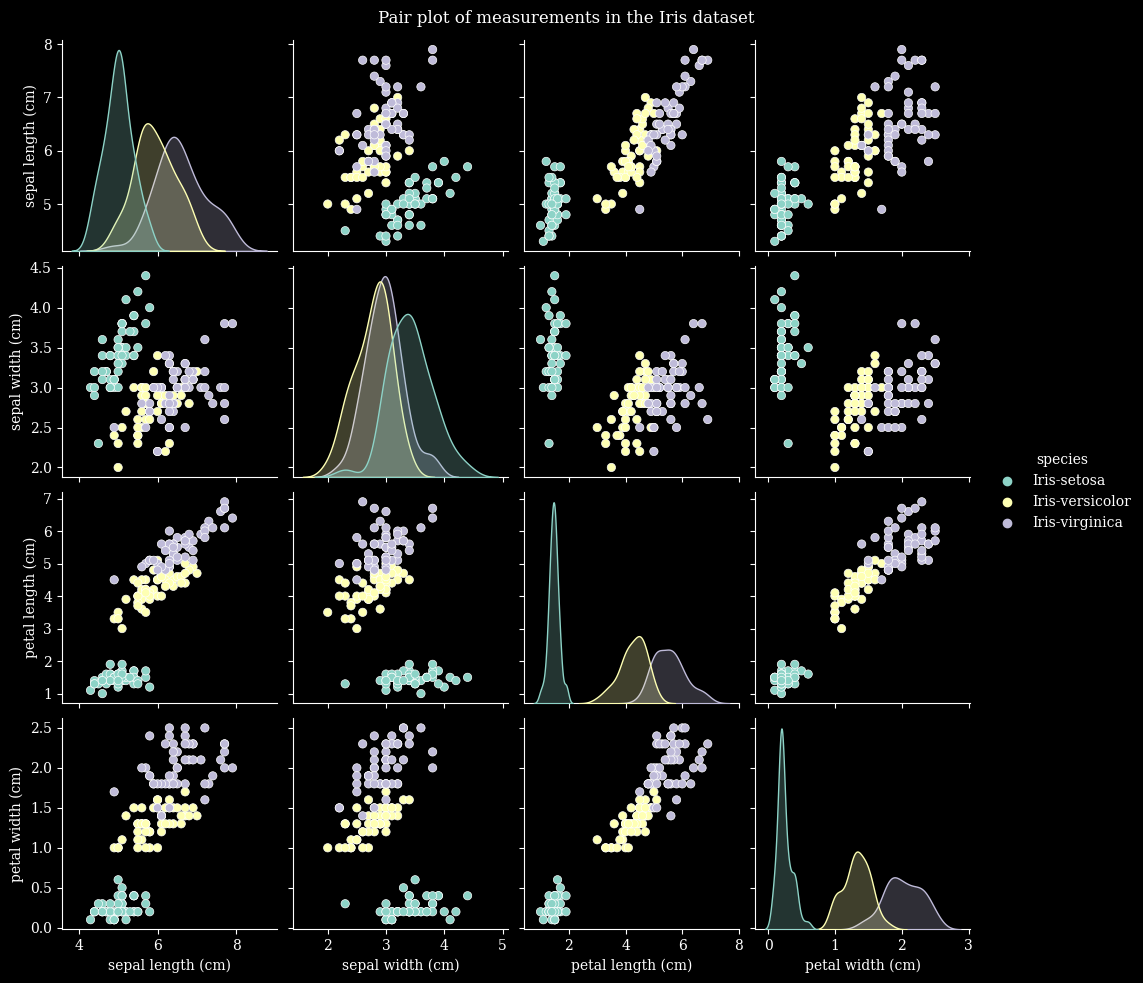

In [11]:
plt.style.use('fast')
sns.pairplot(df, hue="species") #ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html
plt.suptitle("Pair plot of measurements in the Iris dataset") # set title
plt.subplots_adjust(top=0.95) # reducing size of the plot to make more room for the title.
#------output to -png
plt.savefig(f"pairplot.png")
plt.show()

## Project task 4. Perform any other analysis considered appropriate

Once again the visualisation of the Iris data shows that the best way to tell apart the different Iris species is to look at the petal measurements. 
<br>Iris-setosa petal measurements are completely isolate from versicolor and virginica while the latter overlaps.


### Conditional mean of measurements plot based on seaborn chart gallery

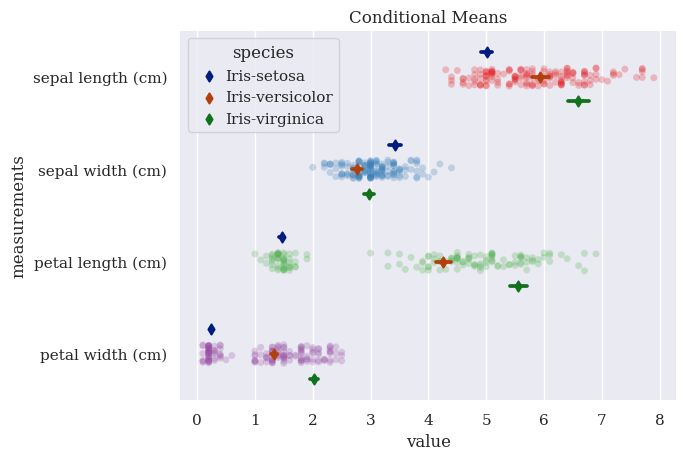

In [12]:
# based on conditional means with opservations from seaborn galery
#https://seaborn.pydata.org/examples/jitter_stripplot.html

sns.set_theme(style="darkgrid", font='serif') # set style

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(df, "species", var_name="measurements") # this will put all measurements into one column

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot( 
    data=iris, x="value", y="measurements", palette="Set1",
    dodge=True, alpha=.25, zorder=1
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=iris, x="value", y="measurements", hue="species",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)
ax.set_title("Conditional Means") # set title
# Improve the legend
sns.move_legend(
    ax, loc="upper left", ncol=1, frameon=True, columnspacing=1, handletextpad=0
)

BoxPlot

typical Iris-setosa petal lenght is between 1.4-1.58cm
typical Iris-versicolor petal lenght is between 4.0-4.6cm
typical Iris-virginica petal lenght is between 5.1-5.88cm


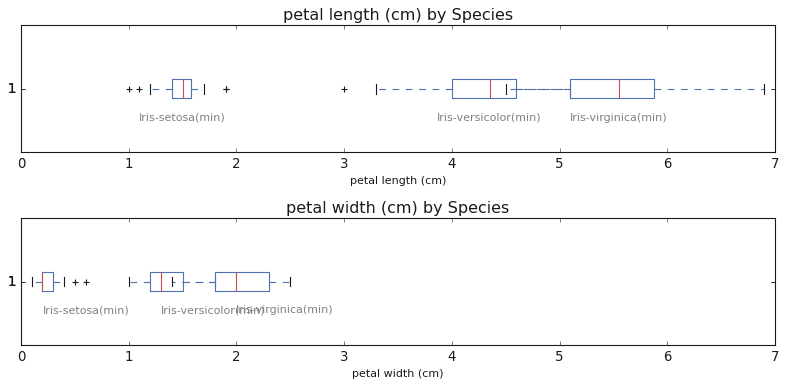

In [13]:
#ref: https://www.youtube.com/watch?v=q68Qundmans&t=3076s
plt.style.use("classic") # ref galery: http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
l = headers[2] #"petal length (cm)"
w = headers[3] #"petal width (cm)"
fig, axs = plt.subplots(2, 1, figsize=(10, 5), facecolor='white') # plotting 2 subplots on top of each other, classic with white background
for i in irises: # iterating through species
    petal_lengths = df.loc[df['species'] == i][l] #filter to petal lenghts per species
    petal_widths = df.loc[df['species'] == i][w] #filter to petal widths per species
    med_petal_lengths = df.loc[df['species'] == i][l].median() # minimum petal lenghts per species for label position
    med_petal_widths = df.loc[df['species'] == i][w].median() # minimum petal widths per species for label position
    boxleft = df.loc[df['species'] == i][l].quantile(0.25) #left side of the box is the end of the first quantile
    boxright = df.loc[df['species'] == i][l].quantile(0.75) #left side of the box is the end of the first quantile
    # top plot 
    axs[0].boxplot(x=petal_lengths, vert=False)
    axs[0].set_title(f"{l} by Species") # set title from variables
    axs[0].set_xlabel(l,size='smaller') # # set axis lable from variables
    axs[0].set_xlim(0,7) # set min/max axis values for aestetics
    axs[0].text(med_petal_lengths,0.75,f'{i}(min)', color='grey', size='small', ha='center') # set a nd style labels
    # bottom plot
    axs[1].boxplot(x=petal_widths, vert=False)
    axs[1].set_title(f"{w} by Species")
    axs[1].set_xlabel(w, size='smaller')
    axs[1].set_xlim(0,7) 
    axs[1].text(med_petal_widths,0.75,f'{i}(min)', color='grey', size='small', ha='left') 
    print(f'typical {i} petal lenght is between {round(boxleft,2)}-{round(boxright,2)}cm')

plt.tight_layout()
    

### A proposed practical use:

If we were to identify species in future samples without counting chromosomes we can use the min and max measurements of petal dimensions for each species;

In [14]:

#irises=['Iris-setosa','Iris-versicolor','Iris-virginica']
irises = df['species'].unique() # count unique elements ref: https://practicaldatascience.co.uk/data-science/how-to-identify-and-count-unique-values-in-pandas#:~:text=To%20count%20the%20number%20of,the%20number%20of%20unique%20values.
for i in irises:
    print(i,'\n',df.loc[df['species']==i][headers[2:4]].describe().loc[['min','max']]) 
    # pandas tutorial to filter data ref: https://www.youtube.com/watch?v=vmEHCJofslg&t=111s
    # limit describe output to min and max ref: https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe, 



Iris-setosa 
      petal length (cm)  petal width (cm)
min                1.0               0.1
max                1.9               0.6
Iris-versicolor 
      petal length (cm)  petal width (cm)
min                3.0               1.0
max                5.1               1.8
Iris-virginica 
      petal length (cm)  petal width (cm)
min                4.5               1.4
max                6.9               2.5


Based on the above data, a sample can be classified as<br>
+ Iris-setosa with max petal length at 1.9cm and max petal width of 0.6cm
+ Iris-versicolor with petal length between 3.0-4.5cm and petal width between 1.0-1.4cm
+ Iris-virginica with petal lengths between 5.1-6.9cm and petal width between 1.8-2.5cm
<br><br>Unfortunately, there will be a mixed bag of Iris-versicolor and Iris-virginica with petal lengths between 4.5-5.1cm and petal width between 1.4-1.8cm, these will require a chromosome count to identify the species.

## Classification routine based on petal lenght

Based on the analysis petal lenght is a suitable measurement to classify new samples with.

In [75]:
#Classifier

test = 4
petalmeasurements = []
typicalmeasurements = []
returnme=[]
pL = headers[2] #"petal length (cm)"
for species in df['species'].unique():
    l_min = df.loc[df['species'] == species][pL].min()
    l_max = df.loc[df['species'] == species][pL].max()
    boxleft = df.loc[df['species'] == i][l].quantile(0.25) #left side of the box is the end of the first quantile
    boxright = df.loc[df['species'] == i][l].quantile(0.75) #left side of the box is the end of the first quantile
    petalmeasurements.append([species, l_min, l_max])
    typicalmeasurements.append([species, boxleft, boxright])
#print(test)
criteria = pd.DataFrame(petalmeasurements, columns=['species','Petal Lenght min','Petal Lenght max']) 
typical = pd.DataFrame(petalmeasurements, columns=['species','typicalmin','typicalmax'])
#unique = criteria['species'].nunique() # count unique elements ref: https://practicaldatascience.co.uk/data-science/how-to-identify-and-count-unique-values-in-pandas#:~:text=To%20count%20the%20number%20of,the%20number%20of%20unique%20values.
result = criteria.loc[(criteria['Petal Lenght min'] <= test) & (criteria['Petal Lenght max'] >= test)]
typical = typical.loc[(typical['typicalmin'] <= test) & (typical['typicalmax'] >= test)]

if result.empty: #error handling for Empty Dataframe (ref: https://stackoverflow.com/questions/48558511/create-an-exception-for-empty-dataframe)
    print("No matching species in the dataframe for that sample")
    print(f"\n \t\tClassification criteria: \n\n",criteria)
else: # output:
    for index, row in result.iterrows(): # iterate if more than one result (ref: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)            
        returnme.append(row['species']) #final result
    #print("The sample matches criteria for the following species:")
if returnme==[]:# exception handling if no match
        display="not a match"
else:
        display = " or ".join(returnme)
if len(returnme) == 1:
     print(f"The sample is a typical {display}")
else:
     print(f"The sample is non-typical and could be either {display}")

The sample is a typical Iris-versicolor


In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Visualisation for the Classifier
BoxPlots + mimimax + plotting additional sample value

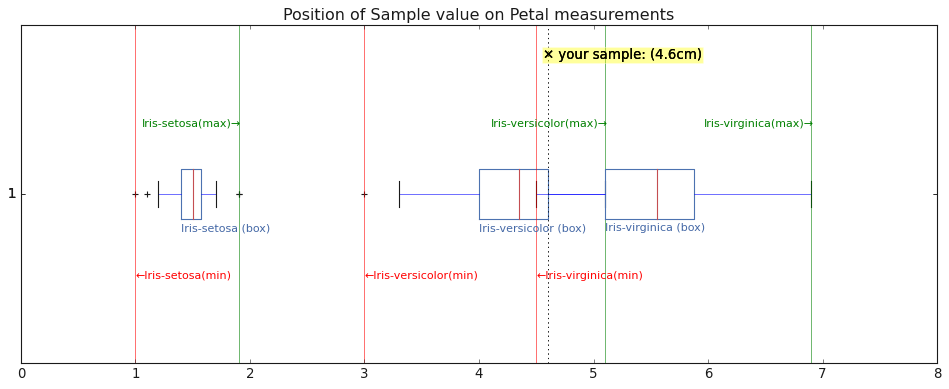

In [17]:
# ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html
l = headers[2] #"petal length (cm)"
plt.style.use("classic") # ref galery: http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
plt.figure(figsize=(10,3),facecolor='white')
plt.title("Position of Sample value on Petal measurements")
a_number=test # test number from classifier
for i in irises:
    min_petal_lengths = df.loc[df['species'] == i][l].min()
    max_petal_lengths = df.loc[df['species'] == i][l].max()
    med_petal_lengths = df.loc[df['species'] == i][l].quantile(0.25) #left side of the box is the end of the first quantile
    l_toboxplot=df.loc[df['species'] == i][l]
    plt.boxplot(l_toboxplot,
        vert=False,
        whiskerprops={'color':'blue', 'linestyle':'-', 'lw':0.5}
        )
    plt.tight_layout(pad=-5)
    plt.xlim(0,8) # set axis min and max to make rom for text
    plt.axvline(min_petal_lengths, color='red', linestyle='-',lw=0.5) #minimum petal line
    plt.axvline(max_petal_lengths, color='green', linestyle='-',lw=0.5) #max petal line
    plt.axvline(a_number, color='black', linestyle=':',lw=0.5) # plotting the sample measurement from the classifier
    plt.text(min_petal_lengths,0.75,f'←{i}(min)', color='red', size='small') # min lables
    plt.text(max_petal_lengths+0.022,1.2,f'{i}(max)→', color='green', size='small', ha='right') # max label
    plt.text(med_petal_lengths,0.89,f'{i} (box)', color='#4468a6', size='smaller',ha='left') # med lables
    plt.text(a_number-0.04,1.4,f'✕ your sample: ({a_number}cm)',color='black',bbox=dict(facecolor='yellow', alpha=0.15, edgecolor='white', pad=1)) # classifier sample label

Another graph - Joint plot. It's pretty.

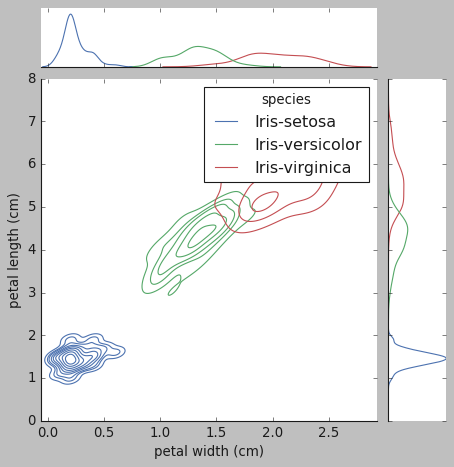

In [18]:
#ref: https://stackoverflow.com/questions/62937646/correctly-add-a-legend-to-a-seaborn-jointplot
g = sns.jointplot(
    data=df,
    x="petal width (cm)", y="petal length (cm)", hue="species",
    kind='kde'
)
#g.ax_joint.legend(loc='upper left')

plt.savefig(f"jointplot.png")
plt.show()

## Heatmap

HEatmap can be used to visualise correlation betwneen data

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.109369           0.871754   
sepal width (cm)           -0.109369          1.000000          -0.420516   
petal length (cm)           0.871754         -0.420516           1.000000   
petal width (cm)            0.817954         -0.356544           0.962757   

                   petal width (cm)  
sepal length (cm)          0.817954  
sepal width (cm)          -0.356544  
petal length (cm)          0.962757  
petal width (cm)           1.000000  


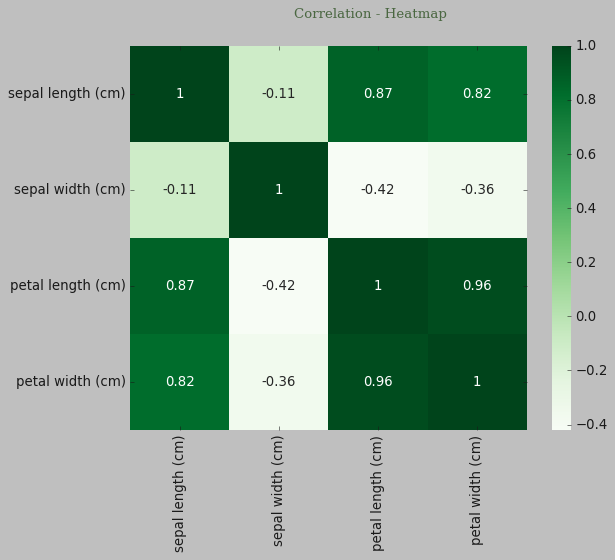

In [19]:
# Checking correlation ref: https://zion-oladiran.medium.com/exploratory-data-analysis-iris-dataset-68897497b120

# calculate correlation
correlation = df.corr()
# text report
print(correlation)
# title 
plt.subplots_adjust(top=0.90) #adjust size
plt.suptitle("Correlation - Heatmap", fontdict={"family":"serif","color":"#4a6741",'weight':'bold',"size":12})
# heatmap
sns.heatmap(correlation, annot=True, cmap='Greens')
# save to file
plt.savefig("heatmap.png")
plt.show()


Correlation data shows that petal lenght and width has high correlation therefore the longer petals are likely to be wider as well. It seems the sepal lenght also have a significant correlation with the petal dimensions, meanwhile there is a noticable negative correlation between sepal width and overall petal size. This indicates that an Iris flower with an overall larger petal would have a longer sepal as well.